In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-59.65548030220879 -175.84165155959073
-66.98285588761033 -88.05313725705875
22.611249945089014 -168.97781865922275
12.709144802191858 -120.61530164043452
47.12571398490687 68.9488812348151
62.367525821046826 -49.145340987236864
-77.34691714616802 133.19467656064143
-73.82163268834097 -56.71855581915581
-17.816032825784262 -19.945713065362042
53.46217609869689 -66.5408347485103
-55.19756977675935 20.533069829612003
-60.65112886706629 -112.49984261666879
76.22314951708805 71.81797826760186
18.00947916918345 -41.86014336897162
4.978401049144566 -5.487895409520945
-4.703153320419872 -146.80383497627525
35.997950345228546 -104.64012714306698
-21.7117829257504 -52.336512089396905
-66.63342748427748 -111.75406361097032
58.27924306191139 176.59385420206144
56.54197542176175 -147.13952014166722
-47.56930027358678 -107.7407300201131
-25.44643962113787 -9.110882230422078
-14.739686193644644 -117.32357756076144
29.046397545107425 132.42157676434658
85.66992988442405 176.10073485809244
-81.8847294

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [60]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [61]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | zhezkazgan
Processing Record 6 of Set 1 | paamiut
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | sept-iles
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | cayenne
Processing Record 14 of Set 1 | grand-lahou
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | las vegas
Processing Record 17 of Set 1 | presidente epitacio
Processing Record 18 of Set 1 | beringovskiy
Processing Record 19 of Set 1 | homer
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Se

Processing Record 34 of Set 4 | okhotsk
Processing Record 35 of Set 4 | dunedin
Processing Record 36 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 37 of Set 4 | safranbolu
Processing Record 38 of Set 4 | agadez
Processing Record 39 of Set 4 | lavrentiya
Processing Record 40 of Set 4 | tiznit
Processing Record 41 of Set 4 | tiksi
Processing Record 42 of Set 4 | kungurtug
Processing Record 43 of Set 4 | byron bay
Processing Record 44 of Set 4 | barrow
Processing Record 45 of Set 4 | tasiilaq
Processing Record 46 of Set 4 | tazovskiy
Processing Record 47 of Set 4 | monrovia
Processing Record 48 of Set 4 | anadyr
Processing Record 49 of Set 4 | chimbote
Processing Record 50 of Set 4 | ouegoa
Processing Record 1 of Set 5 | fuzhou
Processing Record 2 of Set 5 | port lincoln
Processing Record 3 of Set 5 | yuli
Processing Record 4 of Set 5 | ucluelet
Processing Record 5 of Set 5 | bowmore
Processing Record 6 of Set 5 | geraldton
Processing Record 7 of Set 5 | lompoc
Process

Processing Record 26 of Set 8 | ancud
Processing Record 27 of Set 8 | havelock
Processing Record 28 of Set 8 | carutapera
Processing Record 29 of Set 8 | cadereyta
Processing Record 30 of Set 8 | vila velha
Processing Record 31 of Set 8 | yar-sale
Processing Record 32 of Set 8 | camacha
Processing Record 33 of Set 8 | tyumentsevo
Processing Record 34 of Set 8 | ulladulla
Processing Record 35 of Set 8 | aksarka
Processing Record 36 of Set 8 | chapeco
Processing Record 37 of Set 8 | manakara
Processing Record 38 of Set 8 | takhatpur
Processing Record 39 of Set 8 | dingzhou
Processing Record 40 of Set 8 | padang
Processing Record 41 of Set 8 | bengkulu
Processing Record 42 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 43 of Set 8 | iqaluit
Processing Record 44 of Set 8 | san cristobal
Processing Record 45 of Set 8 | zachagansk
City not found. Skipping...
Processing Record 46 of Set 8 | gornopravdinsk
Processing Record 47 of Set 8 | yining
Processing Record 48 of Set 

Processing Record 13 of Set 12 | kuche
City not found. Skipping...
Processing Record 14 of Set 12 | camabatela
Processing Record 15 of Set 12 | akyab
Processing Record 16 of Set 12 | seymchan
Processing Record 17 of Set 12 | utiroa
City not found. Skipping...
Processing Record 18 of Set 12 | tabas
Processing Record 19 of Set 12 | necochea
Processing Record 20 of Set 12 | acajutla
Processing Record 21 of Set 12 | tall kayf
Processing Record 22 of Set 12 | ronneby
Processing Record 23 of Set 12 | baltati
Processing Record 24 of Set 12 | dortyol
Processing Record 25 of Set 12 | jahrom
City not found. Skipping...
Processing Record 26 of Set 12 | chimore
Processing Record 27 of Set 12 | nieuw amsterdam
Processing Record 28 of Set 12 | westport
Processing Record 29 of Set 12 | stettler
Processing Record 30 of Set 12 | fukue
Processing Record 31 of Set 12 | masterton
Processing Record 32 of Set 12 | bakchar
Processing Record 33 of Set 12 | moose factory
Processing Record 34 of Set 12 | waipaw

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,76.77,74,20,8.52,TO,2022-11-19 18:03:37
1,Punta Arenas,-53.1500,-70.9167,53.71,35,20,34.52,CL,2022-11-19 18:03:38
2,Kapaa,22.0752,-159.3190,76.10,86,20,17.27,US,2022-11-19 18:03:38
3,Cabo San Lucas,22.8909,-109.9124,80.62,63,75,2.30,MX,2022-11-19 18:03:39
4,Zhezkazgan,47.8043,67.7144,30.11,70,100,1.95,KZ,2022-11-19 18:03:39
5,Paamiut,61.9940,-49.6678,25.36,87,94,6.98,GL,2022-11-19 18:03:40
6,New Norfolk,-42.7826,147.0587,55.92,90,100,2.48,AU,2022-11-19 18:02:00
7,Ushuaia,-54.8000,-68.3000,52.03,49,33,10.96,AR,2022-11-19 18:01:48
8,Georgetown,5.4112,100.3354,78.89,94,40,2.30,MY,2022-11-19 17:59:18
9,Sept-Iles,50.2001,-66.3821,26.06,65,40,8.05,CA,2022-11-19 17:59:02


In [38]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-11-19 18:03:37,-21.2000,-175.2000,76.77,74,20,8.52
1,Punta Arenas,CL,2022-11-19 18:03:38,-53.1500,-70.9167,53.71,35,20,34.52
2,Kapaa,US,2022-11-19 18:03:38,22.0752,-159.3190,76.10,86,20,17.27
3,Cabo San Lucas,MX,2022-11-19 18:03:39,22.8909,-109.9124,80.62,63,75,2.30
4,Zhezkazgan,KZ,2022-11-19 18:03:39,47.8043,67.7144,30.11,70,100,1.95


In [39]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [40]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

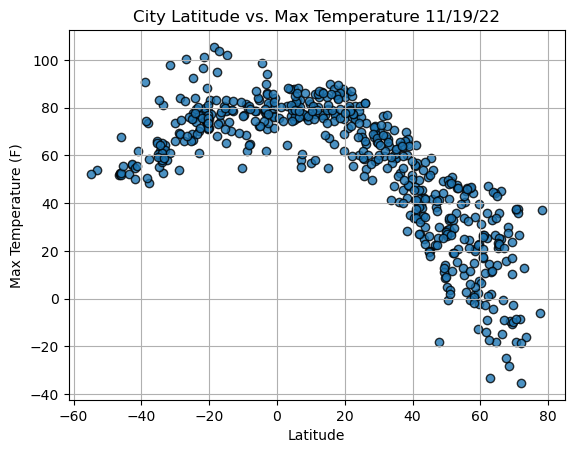

In [41]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

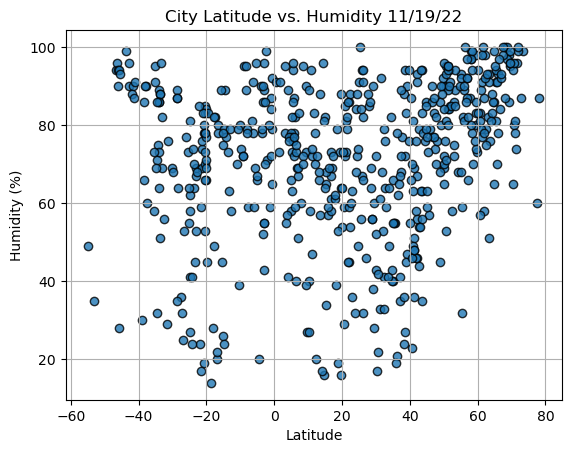

In [42]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

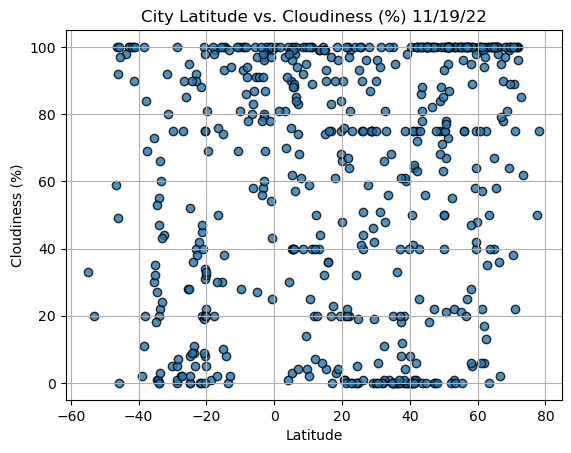

In [43]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

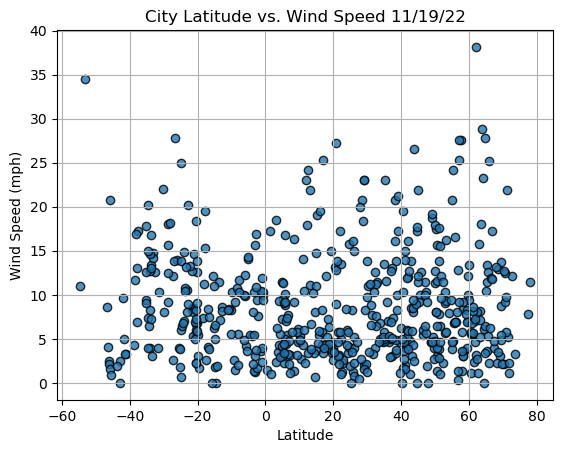

In [44]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [45]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [46]:
index13 = city_data_df.loc[13]
index13

City                  Grand-Lahou
Country                        CI
Date          2022-11-19 18:03:41
Lat                        5.1367
Lng                       -5.0242
Max Temp                    79.07
Humidity                       77
Cloudiness                     40
Wind Speed                   3.51
Name: 13, dtype: object

In [47]:
 city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
554     True
555    False
556     True
557     True
558     True
Name: Lat, Length: 559, dtype: bool

In [48]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Kapaa,US,2022-11-19 18:03:38,22.0752,-159.3190,76.10,86,20,17.27
3,Cabo San Lucas,MX,2022-11-19 18:03:39,22.8909,-109.9124,80.62,63,75,2.30
4,Zhezkazgan,KZ,2022-11-19 18:03:39,47.8043,67.7144,30.11,70,100,1.95
5,Paamiut,GL,2022-11-19 18:03:40,61.9940,-49.6678,25.36,87,94,6.98
8,Georgetown,MY,2022-11-19 17:59:18,5.4112,100.3354,78.89,94,40,2.30
...,...,...,...,...,...,...,...,...,...
552,Tongren,CN,2022-11-19 18:19:23,27.7172,109.1853,56.57,88,59,0.47
554,Carballo,ES,2022-11-19 18:19:24,43.2130,-8.6910,53.91,94,100,5.86
556,Rovinj,HR,2022-11-19 18:19:25,45.0800,13.6400,51.62,77,100,12.17
557,Omsukchan,RU,2022-11-19 18:19:25,62.5333,155.8000,-17.46,75,13,2.66


In [49]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


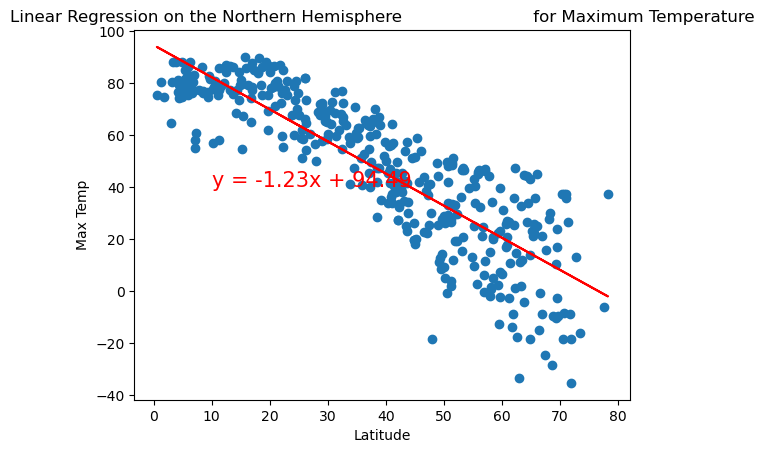

In [50]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

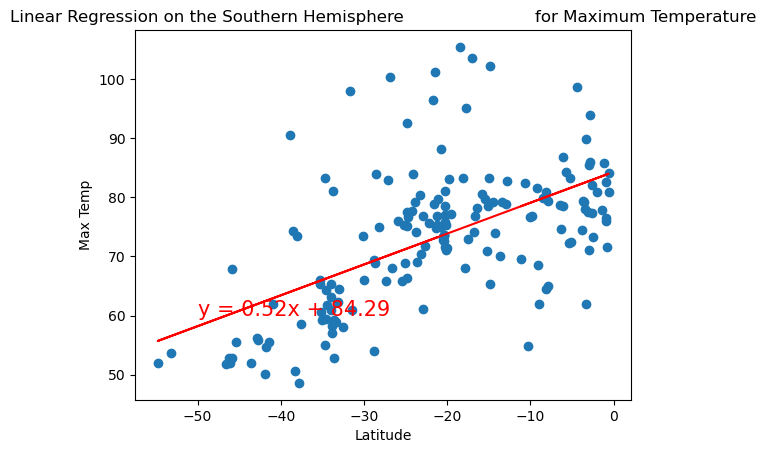

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,60))

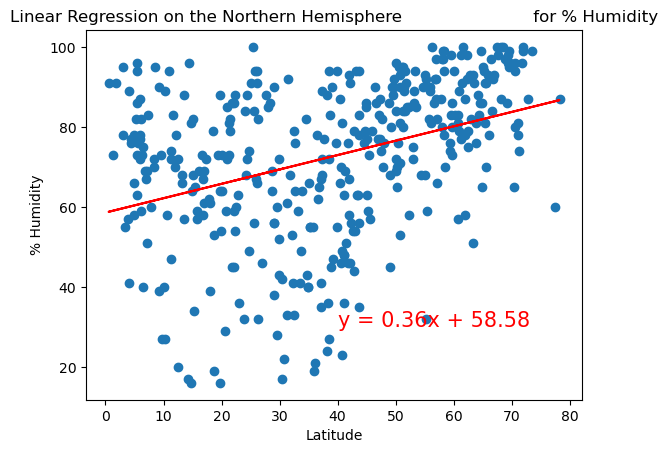

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,30))

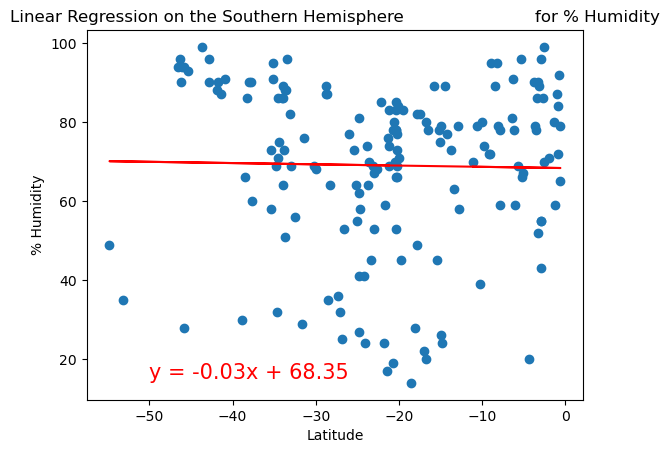

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

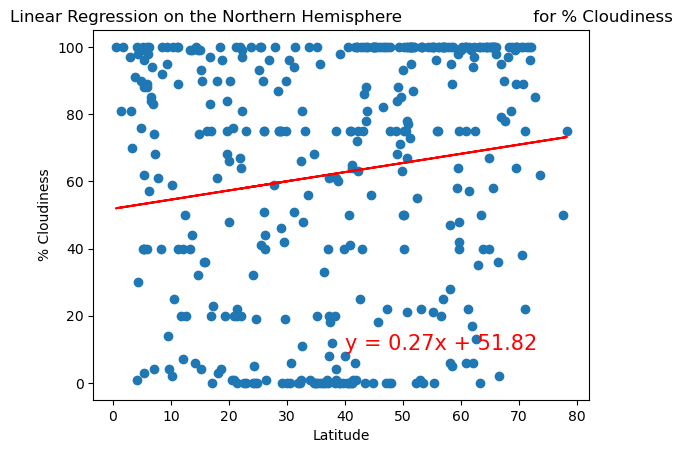

In [54]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

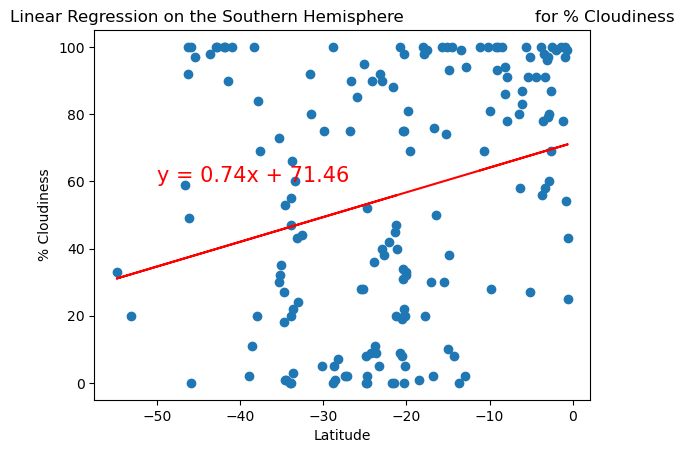

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

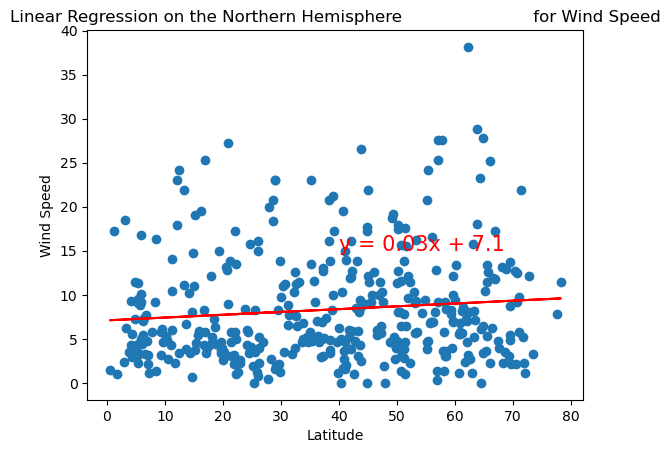

In [56]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,15))

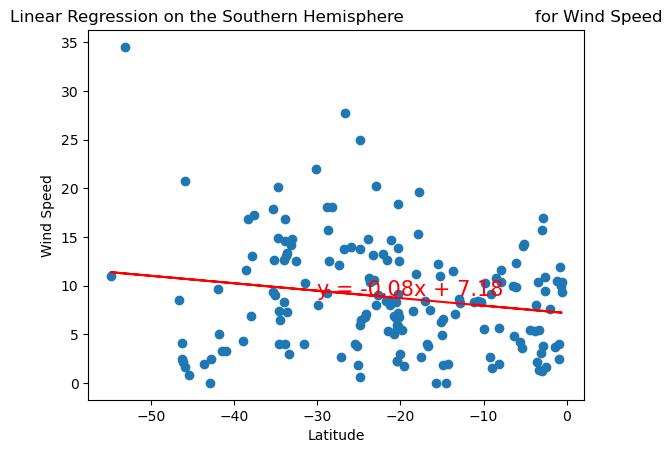

r


In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,9))
print("r")